In [138]:
from google.colab import files
uploaded = files.upload()

In [156]:
!apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [140]:
!pip install pygraphviz

In [0]:
import io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
import pylab

In [0]:
class Node:
  def __init__(self, name):
    self.name = name
    self.edges = {}
    self.isEnd = False
    self.value = ""

In [0]:
df = pd.read_csv('Vegetatiuon-Table.csv', header = None)
dftest = pd.read_csv('queries.csv', header = None)
fields = df.iloc[0:1, 0:]
data = df.iloc[1:, 1:]
testdata = dftest.iloc[1:, 1:dftest.shape[1] - 1]
#data1 = data
#del data1[1]
#data2 = data
#del data2[2]
#data3 = data
#del data3[3]

In [0]:
def entropyFunc(data, col):
  datadict = dict(data[col].value_counts())
  H = 0.0
  N = len(data)
  for x in datadict:
    H = H + datadict[x] * math.log2(datadict[x] / N)
  H = -H / N
  return H

In [0]:
def remainderFunc(data, col):
  datadict = dict(data[col].value_counts())
  N = len(data)
  R = 0
  for x in datadict:
    dset = data.loc[data[col] == x]
    R = R + len(dset) * entropyFunc(dset, df.shape[1] - 1)
  R = R / N
  return R    

In [0]:
end_nodes = []

def makeDecisionTree(data, names, level):
  global list_for_graph
  indexes = list(data)
  cols = data.shape[1]
  target = indexes[-1]
  H = entropyFunc(data, target)
  if (H == 0):
    print(data.iloc[0:1, cols-1:cols].values[0][0])
    node = Node(target)
    node.isEnd = True
    node.value = data.iloc[0:1, cols-1:cols].values[0][0]
    return node
  IGlist = []
  for ind in indexes[0 : cols - 1]:
    IGlist.append(H - remainderFunc(data, ind))
  ind = indexes[IGlist.index(max(IGlist))]
  datadict = dict(data[ind].value_counts())
  node = Node(ind)
  for x in datadict:
    print(names[ind].values[0] + "(" + x + ")" + " -> ", end = '')
    dset = data.loc[data[ind] == x]
    del dset[ind]
    node.edges[x] = makeDecisionTree(dset, names, level + 1)
    temp = node.edges[x]
    if (temp.isEnd == True):
      list_for_graph.append([(names[ind].values[0].strip() + "-" + str(level).strip(), temp.value.strip() + "-" + str(level + 1).strip()), x])
      end_nodes.append(temp.value.strip() + "-" + str(level + 1).strip())
    else:
      list_for_graph.append([(names[ind].values[0].strip() + "-" + str(level).strip(), fields[temp.name].values[0].strip() + "-" + str(level + 1).strip()), x])
  return node

In [0]:
end_nodes2 = []

def makeDecisionTreeCG5(data, names, level):
  global list_for_graph2
  indexes = list(data)
  cols = data.shape[1]
  target = indexes[-1]
  H = entropyFunc(data, target)
  if (H == 0):
    print(data.iloc[0:1, cols-1:cols].values[0][0])
    node = Node(target)
    node.isEnd = True
    node.value = data.iloc[0:1, cols-1:cols].values[0][0]
    return node
  IGlist = []
  for ind in indexes[0 : cols - 1]:
    IGlist.append((H - remainderFunc(data, ind)) / entropyFunc(data, ind)) 
  ind = indexes[IGlist.index(max(IGlist))]
  datadict = dict(data[ind].value_counts())
  node = Node(ind)
  for x in datadict:
    print(names[ind].values[0] + "(" + x + ")" + " -> ", end = '')
    dset = data.loc[data[ind] == x]
    del dset[ind]
    node.edges[x] = makeDecisionTreeCG5(dset, names, level + 1)
    temp = node.edges[x]
    if (temp.isEnd == True):
      list_for_graph2.append([(names[ind].values[0].strip() + "-" + str(level).strip(), temp.value.strip() + "-" + str(level + 1).strip()), x])
      end_nodes2.append(temp.value.strip() + "-" + str(level + 1).strip())
    else:
      list_for_graph2.append([(names[ind].values[0].strip() + "-" + str(level).strip(), fields[temp.name].values[0].strip() + "-" + str(level + 1).strip()), x])
  return node

In [0]:
def printDecisionTree(node):
  if (node.isEnd):
    print(node.value)
    return
  print(fields[node.name].values[0] + " -> ", end = ' ')
  for x in node.edges:
    printDecisionTree(node.edges[x])

In [0]:
def predictValue(data, node):
  if (node.isEnd):
    return node.value
  return predictValue(data, node.edges[data[node.name].values[0]])

In [150]:
list_for_graph = []
list_for_graph2 = []
root1 = makeDecisionTree(data, fields, 0)
print("\n\n")
root2 = makeDecisionTreeCG5(data, fields, 0)
printDecisionTree(root2)

 Elevation ( high ) ->  Slope ( steep ) -> carrot
 Slope ( flat ) -> corriander
 Elevation ( medium ) ->  Stream( true ) -> raddish
 Stream( false ) -> carrot
 Elevation ( low ) -> raddish
 Elevation ( highest ) -> corriander



 Slope ( steep ) ->  Elevation ( high ) -> carrot
 Elevation ( medium ) ->  Stream( true ) -> raddish
 Stream( false ) -> carrot
 Elevation ( highest ) -> corriander
 Slope ( flat ) -> corriander
 Slope ( moderate ) -> raddish
 Slope  ->   Elevation  ->  carrot
 Stream ->  raddish
carrot
corriander
corriander
raddish


['Slope-1', 'carrot-2', 'corriander-2', 'Elevation-0', 'Stream-1', 'raddish-2', 'raddish-1', 'corriander-1']


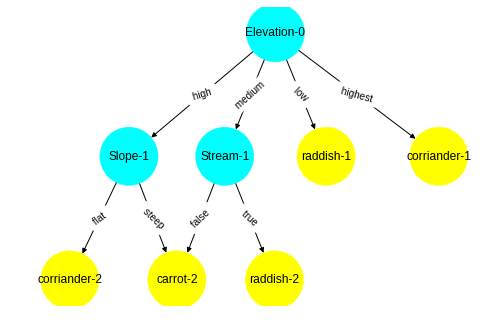

In [159]:
#print("Output according to Decision Tree formed by ID3 algorithm")
#for i in range(testdata.shape[0]):
#  print(predictValue(testdata.iloc[i:i+1, :], root1))
G = nx.DiGraph()
edge_labels = {}
for node in list_for_graph:
    G.add_edges_from([node[0]])
    edge_labels[node[0]]=node[1]

print(G.nodes())

values = []
for node in G.nodes():
    if(node in end_nodes):
        values.append((1, 1, 0))
    else:
        values.append((0, 1, 1))

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
#pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, node_size=3400, node_color=values, with_labels=True)
pylab.show()

['Elevation-1', 'carrot-2', 'Stream-2', 'raddish-3', 'carrot-3', 'corriander-2', 'Slope-0', 'corriander-1', 'raddish-1']


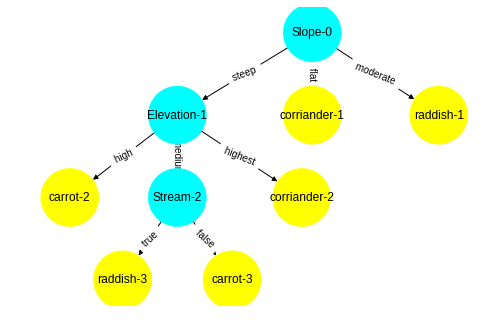

In [158]:
#print("Output according to Decision Tree formed by CG5 algorithm")
#for i in range(testdata.shape[0]):
#  print(predictValue(testdata.iloc[i:i+1, :], root2))
G2 = nx.DiGraph()
edge_labels = {}
for node in list_for_graph2:
    G2.add_edges_from([node[0]])
    edge_labels[node[0]]=node[1]

values = []
for node in G2.nodes():
    if(node in end_nodes2):
        values.append((1, 1, 0))
    else:
        values.append((0, 1, 1))

print(G2.nodes())

pos = nx.drawing.nx_agraph.graphviz_layout(G2,prog='dot')
#pos = nx.shell_layout(G2)
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
nx.draw(G2, pos, node_size=3400, node_color=values, with_labels=True)
pylab.show()